In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
import ee
import geemap
service_account = ' boba-account@boba-430314.iam.gserviceaccount.com '
credentials = ee.ServiceAccountCredentials(service_account,'C:/Users/arj26323/OneDrive - University of Georgia/Documents/GEE AUTH/boba-430314-a19be859bfca.json')

ee.Initialize(credentials)

print(geemap.__version__)

0.34.1


In [3]:
##Virginia
vdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_mayoct.csv')
vdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_yr.csv')
vdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_augoct.csv')
vdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_sepoct.csv')
vmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_min.csv')
vmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_max.csv')

vmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

vmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

vdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

vdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

vdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

vdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

vminmax = pd.merge(vmin, vmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf0 = pd.merge(vdfv, vdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf0x = pd.merge(vdfu, vdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf = pd.merge(vminmax, vdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1 = pd.merge(vdf, vdfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1['ident'] = vdf1['ndvi_yr'] * vdf1['ndvi_augoct'] * vdf1['ndvi_sepoct'] * vdf1['ndvi_mayoct']

vdf1['LTER'] = 'VCR'
vdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

display(vdf1)

,Year,locationID,Latitude,liveMass,Longitude,Transect,N,ndvi_min,Elevation,swe,...,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident,LTER
0,1999,1,37.167147,46.72,-75.940768,A,2,0.228605,0.157865,0.019534,...,-0.066493,0.250916,0.067466,-0.089940,-0.020359,0.132979,-0.312200,-0.066493,0.003454,VCR
1,1999,1,37.174764,399.68,-75.942417,A,2,0.306192,0.170457,0.019534,...,-0.009877,0.306192,0.087636,-0.030227,0.036755,0.151515,-0.315115,-0.009877,0.008129,VCR
2,1999,1,37.180976,441.68,-75.940766,A,2,0.322975,0.417727,0.019945,...,-0.003375,0.414314,0.145102,0.093956,-0.029380,0.183980,-0.417105,-0.003375,0.020663,VCR
3,1999,1,37.287699,669.60,-75.929487,A,2,0.467063,0.601948,0.428658,...,0.176107,0.618321,0.273957,0.358974,-0.017199,0.269939,-0.496251,0.176107,0.095936,VCR
4,1999,1,37.345970,875.52,-75.901065,A,2,0.297033,0.476658,0.374959,...,0.108817,0.424025,0.178325,0.105620,0.035055,0.163515,-0.330456,0.108817,0.020403,VCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,37.287875,96.08,-75.929008,B,2,0.678704,1.035588,0.610603,...,0.252567,0.686454,0.372871,0.457896,-0.044039,0.186089,-0.488264,0.298107,0.229953,VCR
1004,2017,3,37.167768,26.56,-75.944280,C,2,0.414301,0.627959,0.893397,...,0.194727,0.422785,0.215164,0.104126,0.051064,0.134860,-0.216045,0.227521,0.038301,VCR
1005,2017,3,37.449973,279.36,-75.671952,C,1,0.654660,1.261021,0.618466,...,0.234450,0.663949,0.349052,0.424582,-0.077966,0.155104,-0.508682,0.234450,0.173638,VCR
1006,2018,1,37.396051,255.04,-75.876056,C,1,0.534464,0.957294,0.047479,...,0.220411,0.551863,0.309689,0.267790,-0.006429,0.155593,-0.377351,0.220411,0.083406,VCR


In [6]:
##Georgia
gdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_mayoct.csv')
gdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_yr.csv')
gdfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_octnov.csv')
gdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_augoct.csv')
gdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_sepoct.csv')
gdfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_oct.csv')
gmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_min.csv')
gmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_max.csv')

gmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

gmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

gdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

gdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

gdfw.rename(
    columns={
        'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
        'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
    }, inplace=True
)

gdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

gdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

gminmax = pd.merge(gmin, gmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf0 = pd.merge(gdfv, gdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf0x = pd.merge(gdfu, gdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf = pd.merge(gminmax, gdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1 = pd.merge(gdfy, gdf, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1['LTER'] = 'GCE'

gdf1['ident'] = gdf1['ndvi_yr'] * gdf1['ndvi_augoct'] * gdf1['ndvi_sepoct'] * gdf1['ndvi_mayoct']

gdf1.rename(columns={'Plant_Biomass':'liveMass'}, inplace=True)
gdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

# gdf1 = gdf1[gdf1['Species_Code'] == 'A1'] ##Critical step

display(gdf1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,nd_swir2_r_yr,ndvi_augoct,savi_augoct,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident
0,1,A1,2000,1,1,31.538627,516.324,23,-81.422539,10/11/2000,...,0.057010,0.344495,0.104618,0.012609,-0.020024,0.074442,-0.274221,0.077605,GCE,0.010324
1,3,A1,2000,1,1,31.518920,710.396,20,-81.228956,10/18/2000,...,-0.136931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCE,NaN
2,4,A1,2000,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,...,-0.041900,0.294807,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GCE,0.007153
3,5,A1,2000,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,...,0.080958,0.450495,0.194444,0.137864,-0.059056,0.189841,-0.409557,0.050200,GCE,0.035323
4,6,A1,2000,1,1,31.388423,1032.632,20,-81.279792,10/12/2000,...,-0.056655,0.260504,0.123864,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GCE,0.007236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,7,A4,2019,2,8,31.334597,2365.620,14,-81.478039,10/8/2019,...,0.059564,0.615534,0.313861,0.355049,-0.051724,0.389873,-0.590822,0.038835,GCE,NaN
2908,7,A4,2019,1,12,31.335017,1821.010,12,-81.478711,10/8/2019,...,-0.074439,0.570340,0.241713,0.292642,-0.046223,0.329513,-0.602073,-0.048327,GCE,0.077578
2909,7,A4,2019,1,13,31.334934,2482.584,14,-81.478709,10/8/2019,...,-0.151977,0.510239,0.199097,0.213160,-0.035834,0.326165,-0.578947,-0.097514,GCE,0.035903
2910,7,A4,2019,1,16,31.334682,2511.936,17,-81.478564,10/8/2019,...,-0.151977,0.510239,0.199097,0.213160,-0.035834,0.326165,-0.578947,-0.097514,GCE,0.035903


In [7]:
#Combining the datasets

df1 = pd.concat([gdf1, vdf1])

df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 

display(df1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident,locationID,Transect,N
0,1.0,A1,2000,1.0,1.0,31.538627,516.324,23.0,-81.422539,10/11/2000,...,0.012609,-0.020024,0.074442,-0.274221,0.077605,GCE,0.010324,NaN,NaN,NaN
2,4.0,A1,2000,1.0,1.0,31.451676,1534.304,25.0,-81.365498,10/10/2000,...,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GCE,0.007153,NaN,NaN,NaN
3,5.0,A1,2000,1.0,1.0,31.436090,2022.264,25.0,-81.339919,10/10/2000,...,0.137864,-0.059056,0.189841,-0.409557,0.050200,GCE,0.035323,NaN,NaN,NaN
4,6.0,A1,2000,1.0,1.0,31.388423,1032.632,20.0,-81.279792,10/12/2000,...,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GCE,0.007236,NaN,NaN,NaN
5,9.0,A1,2000,1.0,1.0,31.352109,1484.164,20.0,-81.333734,10/16/2000,...,0.064135,-0.030818,0.217064,-0.383589,0.006536,GCE,0.019486,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,NaN,NaN,2017,NaN,NaN,37.287875,96.080,NaN,-75.929008,NaN,...,0.484748,-0.083123,0.225420,-0.549450,0.252567,VCR,0.229953,3.0,B,2.0
1004,NaN,NaN,2017,NaN,NaN,37.167768,26.560,NaN,-75.944280,NaN,...,0.129681,0.037411,0.147155,-0.272668,0.194727,VCR,0.038301,3.0,C,2.0
1005,NaN,NaN,2017,NaN,NaN,37.449973,279.360,NaN,-75.671952,NaN,...,0.424582,-0.077966,0.155104,-0.508682,0.234450,VCR,0.173638,3.0,C,1.0
1006,NaN,NaN,2018,NaN,NaN,37.396051,255.040,NaN,-75.876056,NaN,...,0.267790,-0.006429,0.155593,-0.377351,0.220411,VCR,0.083406,1.0,C,1.0


Mean Absolute Error: 317.96814902213373
Mean Squared Error: 220793.7993924016
Root Mean Squared Error: 469.88700704786635
The r squared is: 0.4507364156355289
0.4507364156355289
testing r2 is: 0.4507364156355289
training r2 is: 0.9049522809974372
NRMSE is: 0.09798604990563266
MEAN BASELINE:
Mean Absolute Error: 433.8265586626763
Root Mean Squared Error: 634.1261390026236


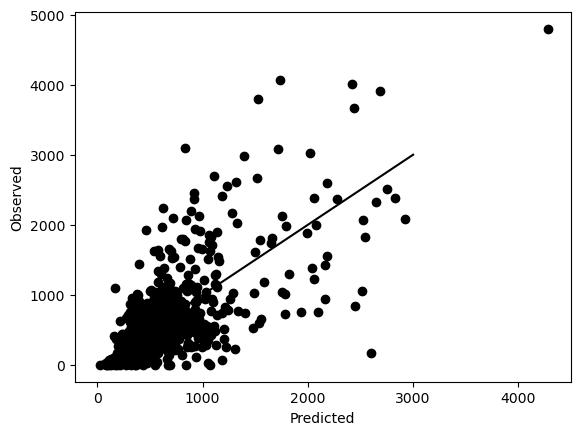

test data correlation coefficient is: 0.6752243437330725
train data correlation coefficient is: 0.96078595679828


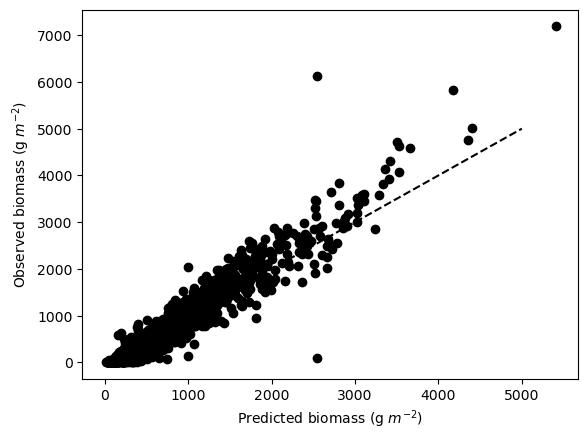

In [8]:
##Machine learning
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr','ndvi_mayoct',
        'savi_mayoct','wdrvi5_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct'
    ]
]

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct'
    ]
]

#, 'ndvi_min', 'ndvi_max'

#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'
##DOY!!!

# ##Include lag variables (e.g. lag ndvi), precip, temp, more

yargs=df1['liveMass'] 

size_x = 0.2
seed = 1
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

# Pipeline example:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, pred)))
r_square = metrics.r2_score(yargs_test, pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test,pred_mean)))

plt.scatter(pred, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'black')
plt.xlabel("Predicted biomass (g $m^{-2}$)")
plt.ylabel("Observed biomass (g $m^{-2}$)")
plt.plot([0, 5000], [0, 5000], 'k--')
plt.show
# plt.savefig("C:/Users/arj26323/Documents/train.png", dpi = 1000)

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [9]:
##k-fold cross validation; random forest
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance

predictors = xargs

targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
# from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

{'fit_time': array([2.1972084 , 2.12150502, 2.02086377, 2.08302689, 2.04638338]),
 'score_time': array([0.01565504, 0.01630449, 0.02007818, 0.01562262, 0.03124499]),
 'test_r2': array([0.48810134, 0.45669256, 0.40534629, 0.39859938, 0.51654605]),
 'test_neg_root_mean_squared_error': array([-500.16475219, -513.68590996, -463.55651248, -496.25790793,
        -420.25388945])}

In [8]:
#Feature importance and average RMSE
x = pd.DataFrame(cv_results)
print(x['test_r2'].mean())
print(x['test_neg_root_mean_squared_error'].mean())
print('NRSME is: ' + str(x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

pipe.steps[1][1].feature_importances_

0.32528893956755295
-435.2276025287374
NRSME is: -0.12501108786318627


array([0.16288054, 0.13897805, 0.10194257, 0.04475204, 0.07778216,
       0.04720228, 0.08634489, 0.09694195, 0.16634609, 0.07682944])

In [9]:
##Testing: on unseen MA data, EOY Biomass
##Massachusetts
mdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_mayoct.csv')
mdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_yr.csv')
mdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_augoct.csv')
mdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_sepoct.csv')
mmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_min.csv')
mmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_max.csv')

mmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

mmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

mdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

mdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

mdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

mdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

mminmax = pd.merge(mmin, mmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf0 = pd.merge(mdfv, mdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf0x = pd.merge(mdfu, mdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf = pd.merge(mminmax, mdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf1 = pd.merge(mdf, mdfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf1['ident'] = mdf1['ndvi_yr'] * mdf1['ndvi_augoct'] * mdf1['ndvi_sepoct'] * mdf1['ndvi_mayoct']

mdf1['LTER'] = 'PIE'
mdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

df_test = mdf1.copy()
df_test = df_test[df_test['Month'] == 9]
df_test = df_test[df_test['ident'].notna()]
df_test = df_test[df_test['Elevation'].notna()]
# df1 = df1[df1['ndvi_min'].notna()] ##Something wrong with ndvi_min

# df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

df_test.drop('ndvi_min', axis=1, inplace=True)
df_test.drop('ndvi_max', axis=1, inplace=True)

In [10]:
ma_xargs=df_test[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr','ndvi_mayoct',
        'savi_mayoct','wdrvi5_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct'
    ]
]

ma_yargs=df_test['liveMass'] 

ma_pred = pipe.predict(ma_xargs)
df_test['Prediction'] = pipe.predict(ma_xargs)

print('Mean Absolute Error:', metrics.mean_absolute_error(ma_yargs, ma_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ma_yargs, ma_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ma_yargs, ma_pred)))
r_square = metrics.r2_score(ma_yargs, ma_pred)
print("The r squared is: " + str(r_square))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(ma_yargs, ma_pred))/np.ptp(ma_yargs)))

plt.scatter(ma_pred, ma_yargs, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 2000], [0, 2000], 'k--')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- nd_g_b_mayoct
- nd_g_b_yr
- nd_r_g_mayoct
- nd_r_g_yr
- nd_swir2_nir_mayoct
- ...


In [ ]:
df_final = pd.concat([df1, df_test])
# df_final = df_final[df_final['ident'].notna()] ##remove rows with NaN for columns used in the model 
##Histogram plots
g = sns.FacetGrid(data=df_final, col='LTER', aspect=1)
g.map(plt.hist, 'liveMass', color = 'black', bins = 25).add_legend()
g.set_axis_labels("Biomass (g $m^{-2}$)", "Frequency (number)")

plt.show()
# g.figure.savefig("C:/Users/arj26323/Documents/hist.png", dpi = 1000, bbox_inches = "tight")

In [ ]:
##Showing predicted vs. observed at each LTER site

import seaborn as sns

xxx = pd.DataFrame(data = [pred, yargs_test]).T
xxx.columns = ['Prediction', 'liveMass']
zzz = df_test[['Prediction', 'liveMass']]

x = pd.concat([xxx, zzz])

y_hats = pipe.predict(xargs)
df1['Prediction'] = y_hats

yyy = pd.merge(df_final, x, on = ['Prediction', 'liveMass'])

g = sns.FacetGrid(data=yyy, hue='LTER', aspect=1.5, palette='BuGn')
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()
g.set_axis_labels("Predicted biomass (g $m^{-2}$)", "Observed biomass (g $m^{-2}$)")
plt.plot([0, 3000], [0, 3000], 'k--')

g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))

g = sns.FacetGrid(data=yyy, col='LTER', aspect=1)
g.map(plt.scatter, 'Prediction', 'liveMass', color = 'black').add_legend()
g.set_axis_labels("Predicted biomass (g $m^{-2}$)", "Observed biomass (g $m^{-2}$)")

axes = g.fig.axes
x = np.arange(0, 3000, 1)
y = x
for ax in axes:
    ax.plot(y, x,'k--')
plt.show()

plt.show()
g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))
# g.figure.savefig("C:/Users/arj26323/Documents/test.png", dpi = 1000, bbox_inches = "tight")

print(len(df_final['Prediction']))
print(len(yyy['Prediction']))

In [ ]:
##Showing predicted vs. observed at each LTER site

import seaborn as sns

xxx = pd.DataFrame(data = [pred, yargs_test]).T
xxx.columns = ['Prediction', 'liveMass']

y_hats = pipe.predict(xargs)
df1['Prediction'] = y_hats

yyy = pd.merge(df1, xxx, on = ['Prediction', 'liveMass'])

g = sns.FacetGrid(data=yyy, hue='LTER', aspect=1.5)
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()
g.set_axis_labels("Predicted biomass (g $m^{-2}$)", "Observed biomass (g $m^{-2}$)")
plt.plot([0, 3000], [0, 3000], 'k--')

g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))

g = sns.FacetGrid(data=yyy, col='LTER', aspect=1.25)
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()
g.set_axis_labels("Predicted biomass (g $m^{-2}$)", "Observed biomass (g $m^{-2}$)")

axes = g.fig.axes
x = np.arange(0, 3000, 1)
y = x
for ax in axes:
    ax.plot(y, x,'k--')
plt.show()

plt.show()
g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))

In [ ]:
##Histogram plots
g = sns.FacetGrid(data=yyy, col='LTER', aspect=1)
g.map(plt.hist, 'liveMass', color = 'black', bins = 25).add_legend()
g.set_axis_labels("Biomass (g $m^{-2}$)", "Frequency (number)")

plt.show()
# g.figure.savefig("C:/Users/arj26323/Documents/hist.png", dpi = 1000)

In [ ]:
#Elevation is very important

# xargs=df1[
#     [
#         'Elevation', 'tmax', 'nd_swir2_nir_augoct', 'nd_r_g_yr','nd_swir2_nir_yr', 'ndvi_min', 'ndvi_max'
#     ]
# ]

# xargs=df1[
#     [
#         'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
#         'savi_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_yr',
#         'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr',
#         'savi_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct',
#         'vp', 'srad', 'prcp', 'ndvi_min', 'ndvi_max'
#     ]
# ]

# yargs=df1['liveMass'] 

g = df1.plot(kind = 'scatter', x = 'nd_swir2_nir_augoct', y = 'liveMass')

g

In [ ]:
print(len(df_final[df_final['LTER'] == 'MA']))

In [ ]:
#xgboost model

from xgboost import XGBClassifier, XGBRegressor
pipe_x = Pipeline([('scaler', StandardScaler()), ('xgboost', XGBRegressor())])

pipe_x.fit(xargs_train, yargs_train)
pred_x=pipe_x.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred_x))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, pred_x))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, pred_x)))
r_square = metrics.r2_score(yargs_test, pred_x)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe_x.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe_x.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, pred_x))/np.ptp(yargs_test)))


plt.scatter(pred_x, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted biomass (g $m^{-2}$)")
plt.ylabel("Observed biomass (g $m^{-2}$)")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, pred)[0, 1]))

train_pred = pipe_x.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'black')
plt.xlabel("Predicted biomass (g $m^{-2}$)")
plt.ylabel("Observed biomass (g $m^{-2}$)")
plt.plot([0, 5000], [0, 5000], 'k--')
plt.show
# plt.savefig("C:/Users/arj26323/Documents/train.png", dpi = 1000)

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))